## Model Fitness gym. Customer retention strategy <a class="tocSkip">

## Introduction <a class="tocSkip">
The gym chain Model Fitness is developing a customer interaction strategy in order for marketing department to reduce churn level. <br> We will analyse: 4000 customer profile statistics that Model Fitness has digitized for a 1 month period
    <br> We will study: customer interaction based on analytical data from the customer profiles

## Step 1. Reading the data<a class="tocSkip">

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
try:
    data = pd.read_csv('C:/Users/Anait Akopyan/Desktop/Yclass/Module2/gym_churn_us.csv')
    
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

In [38]:
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


dataset has 14 columns and 4000 rows. We'll have a detailed look at the next step

## Step 2. Exploratory data analysis (EDA)

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

dataset doesnt have any NaN's. All the features are converted to the numerical. Data types of each column look reasonable. But seems like we can convert 'Month_to_end_contract' from float to int.

In [4]:
data['Month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: Month_to_end_contract, dtype: int64

as we assumed we can convert the values to int type

In [5]:
data['Month_to_end_contract'] = data['Month_to_end_contract'].astype('int64')

In [6]:
data.duplicated().sum()

0

dataset has no duplicates

lets study the mean values and standard deviation of the dataset

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


we can see the basic details of the customers: the gym held 4000 customers during the month, both males and females, from 18 to 41 y o, most of the customers live or work near the gym, most of the customers provided their phone number. Average age is 29 y o. To have more detailed characteristic lets group the values in two groups:

## Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [8]:
data['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

we have data on churn for a given month, 2939 people out of 4000 are staying and 1061 are leaving which is 73% and 27% respectively.

Split the values in two groups by churn indicator:

In [9]:
data.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Now we see two category of people: clients who still go to the gym - 0 and people who are no longer the clients - 1. We can conclude that these category are split by gender almost evenly. 0 churn live or work closer to the gym than 1 churn but the difference is not that big. 53% of 0 Churn are employees of a partner company (the gym has partner companies whose employees get discounts) and only 35% of Churn 1. Almost equal share of the customers from both categories provided their phone number. Majority of people who left the gym were short membership holders. 46% of customers go to group session, and only 26% who left the gym. People who still go to the gym are 29 y o in average (vs 26 y o who left). Gym users bring more money to the gym (158.4) by buying additional gym services: cafe, athletic goods, cosmetics, massages, etc (vs 115 who left). An average user leaves the gym with 1.6 month remaining until the contract expires (vs 5.2 months for gym users). It seems like an average users decides at the beginning of the membership either that gym suits him (less then 1 month). Both categories usually go to the gym 1-2 times a week.

Since we have data for 1 month, 'Avg_class_frequency_total' and 'Avg_class_frequency_current_month' actually are the same categories. For the future classification model let's remove one of them - Avg_class_frequency_current_month

In [10]:
data = data.drop(columns='Avg_class_frequency_current_month')

## Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [11]:
data_churn_0 = data.loc[data['Churn']==0].drop(axis=1, columns='Churn')
data_churn_1 = data.loc[data['Churn']==1].drop(axis=1, columns='Churn')

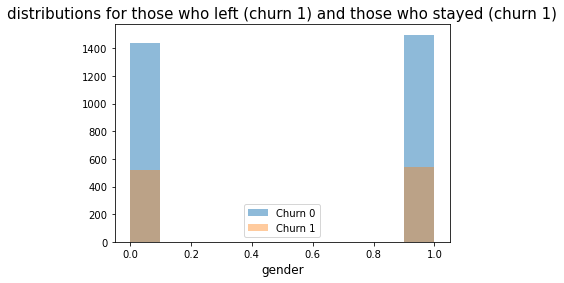

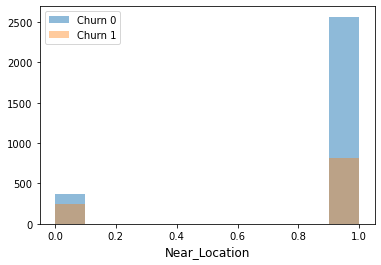

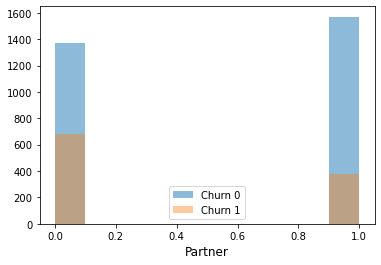

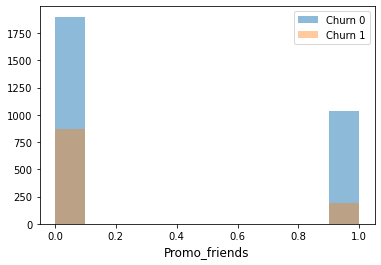

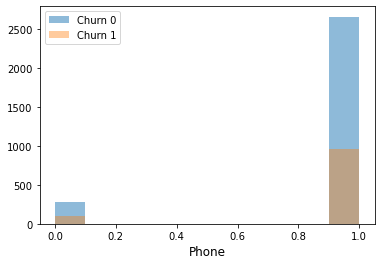

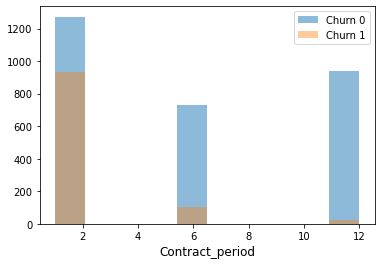

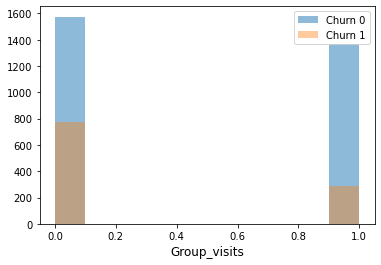

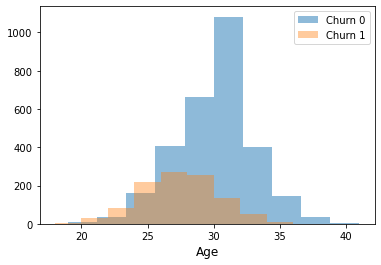

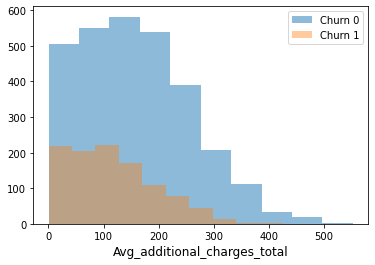

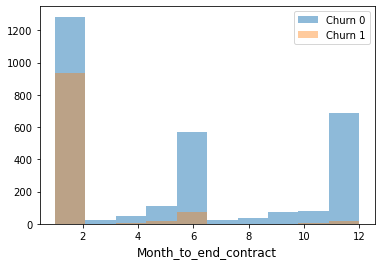

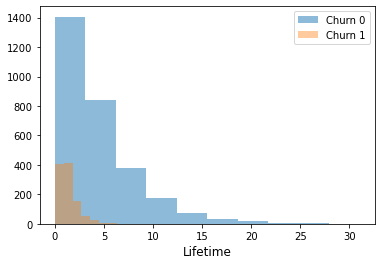

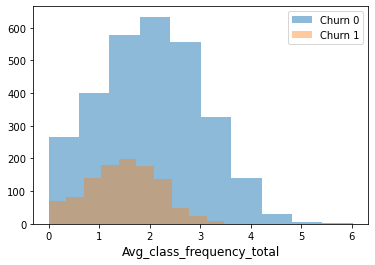

In [12]:
fig, ax = plt.subplots()
plt.title('distributions for those who left (churn 1) and those who stayed (churn 1)', fontdict={"size":15})
for col in data_churn_0.columns:

    ax = plt.hist(data_churn_0[col], alpha=0.5, label= ('Churn 0'))
    ax = plt.hist(data_churn_1[col], alpha=0.4, label='Churn 1')
    plt.xlabel(col, fontdict={"size":12})
   
    plt.legend(loc='best')
    plt.show();

we dont observe any obvious outliers so we can use this data to built a model

## Build a correlation matrix and display it.

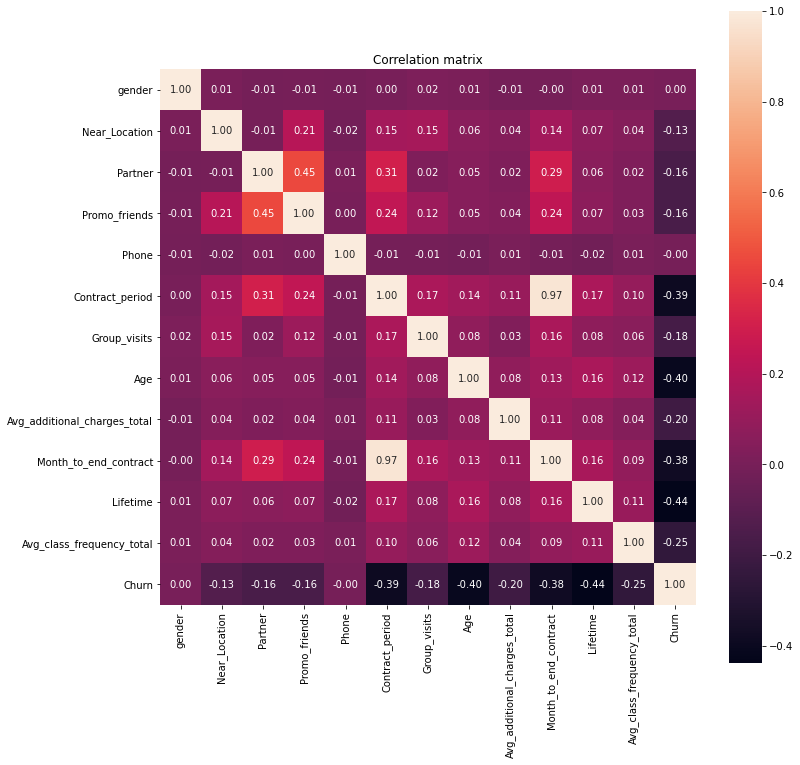

In [13]:
import seaborn as sns

corr_m = data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_m, fmt='.2f', square = True, annot=True)
plt.title('Correlation matrix');

we see quite strong negative correlation between the target value churn and contract period (-0.39), age (-0.4) and lifetime (-0.44). Gender and phone dont correlate with Churn at all.

### EDA Conclusion
 The analysis from EDA can draw a picture of an average user who is leaving the gym:
- both male and female evenly leave the gym
- even if the gym is close to the job/home it doesnt prevent from the leaving
- its a very slight chance that a leaving user was brought by a friend (and used his promo code). And not that high chance that the user is work for one of the partners companies (which gives a discount as well). So apparently users most likely stay longer if they receive a discount and we need to create a wider catalog of loyalty programs
- A user leaving the gym most likely a short term membersip holder (1 month)
- Leaving users less participate group training, we need to stimulate them to go more often by creating different competition involving prizes or just advertise the group sessions more
- A customer going to the gym just once a week is a potential prone to leaving so we need to get a feedback from that king of customer in order for the gym to prevent churn

## Step 3. Build a model to predict user churn
### Divide the data into train and validation sets using the train_test_split() function.

Lets build a binary classification model for customers where the target feature is the user's leaving next month:

Divide the data into features (the X matrix) and a target variable (y)

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis = 1)
y = data['Churn']

Split the data into train and validation sets (we are using a classic 80/20 split)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

normalizing and standardizing data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

transform train and test sets

In [17]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

 - Train the model on the train set with two methods: logistic regression and 
random forest. <br>
<br> First logistic regression: <br>
define the model's algorithm and train your model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

Use the trained model to make forecasts

In [19]:
predictions = model.predict(X_test_st)

Estimate the probability that an object from the validation set belongs to the second class (class "1" from the two classes "0" and "1")

In [20]:
probabilities = model.predict_proba(X_test_st)[:,1] 

Look at the ratio between the dataset classes, Accuracy only works when classes are balanced,(0.36) 

In [21]:
print('The ratio between classes:\n', data['Churn'].value_counts())

The ratio between classes:
 0    2939
1    1061
Name: Churn, dtype: int64


print the studied metrics for the resulting prediction

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format((roc_auc_score(y_test, probabilities))))

Accuracy: 0.90
Precision: 0.78
Recall: 0.81
F1: 0.80
ROC_AUC: 0.95


we made correct prediction for 90%. ROC_AUC metcric looks also pretty good - 95%. The model seems to predict stability quite well. Recall is 0.81, this implies the model identified 81% of churn which is also good. But lets try to improve that metric using a smaller value of thresholdd.

In [23]:
threshold = 0.4

custom_predictions = [0 if i<threshold else 1 for i in probabilities]

print('Metrics for the prediction with custom threshold')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Metrics for the prediction with custom threshold
Accuracy for custom: 0.89
Precision for custom: 0.75
Recall for custom: 0.83
F1 for custom: 0.79


now  define the new model's algorithm based on random forest method:

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0, n_estimators = 100)

train the random forest model

In [25]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

use the trained model to make predictions and print the metrics:

In [26]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format((roc_auc_score(y_test, rf_probabilities))))

Accuracy: 0.89
Precision: 0.80
Recall: 0.76
F1: 0.78
ROC_AUC: 0.94


### Conclusion: 
At first glance, the models are more or less the same but if we compare ROC_AUC that tells about the quality of the model, LogisticRegression shows the better result (0.95 vs 0.94) and Recall 0.83 vs 0.76.

## Step 4. Create user clusters
### Standardize the data.

creating a scaler class object (normalizer) and training the normalizer and transforming the dataset:

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X) 

- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_sc, method = 'ward')

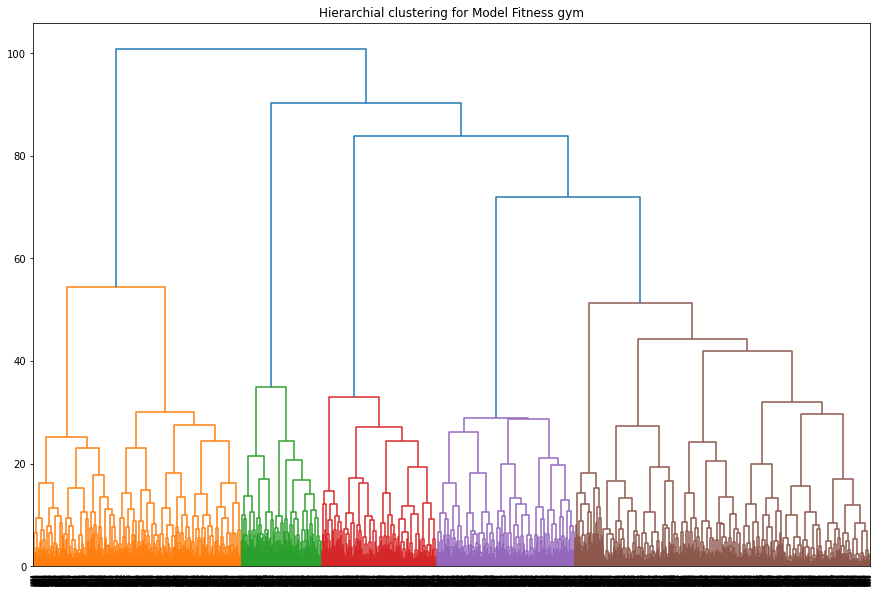

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Model Fitness gym')
plt.show()

we got 5 clusters. the sizes of cluster 2 and cluster 5 are very different

- Train the clustering model with the K-means algorithm and predict customer clusters.(Let the number of clusters be n=5)

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, random_state=0)

applying the algorithm to the data and forming a cluster vector

In [31]:
labels = km.fit_predict(X_sc) 

- Look at the mean feature values for clusters

In [32]:
data['cluster_km'] = labels

In [33]:
clusters = data.groupby(['cluster_km']).mean().T
clusters

cluster_km,0,1,2,3,4
gender,0.498879,0.506829,0.517532,0.502868,0.523316
Near_Location,0.952915,0.998483,1.000000,0.000000,0.862694
Partner,0.738789,0.773900,0.228571,0.466539,0.471503
Promo_friends,0.465247,1.000000,0.000000,0.080306,0.305699
Phone,1.000000,1.000000,1.000000,1.000000,0.000000
Contract_period,11.670404,3.045524,2.094156,2.369025,4.777202
Group_visits,0.548206,0.459788,0.375325,0.217973,0.427461
Age,30.003363,29.125948,28.906494,28.594646,29.297927
Avg_additional_charges_total,166.349406,142.735320,141.772782,136.394309,144.208179
Month_to_end_contract,10.621076,2.840668,1.988961,2.214149,4.466321


Lets study each cluster focusing on unique characteristics:<br>
<u>Cluster 0: </u><br>
    - 2% Churn<br>
    - almost all users (95%) live or work close to the gym<br>
    - 73% percent of users working for a partner company<br>
    - Almost a half (47%) of users originally signed up through a "bring a friend" offer<br>
    - longest contract period - 1 year membership almost all users<br>
    - the highest percent (55%) attend group training
    - the oldest cluster - 30 y o<br>
    - the cluster brings the highest amount of additional charges (166.3)<br>
    - the longest period till the end of the contract - 10.6 months
    - the longest period since the user first came to the gym - 4.7 months<br>
    - the highest class frequency attendance - 2.05 times<br>
<u>Cluster 1: </u><br>
    - 25% Churn<br>
    - all users live or work close to the gym<br>
    - 73% percent (the highest percentage) of users working for a partner company<br>
    - all users are signed up through a "bring a friend" offer<br>
    - contract period is 3 months membership<br>
    - almost a half (46%) attend group training<br>
<u>Cluster 2:</u> <br>
    - 36% Churn<br>
    - all users live or work close to the gym<br>
    - the lawest 22% percent of users working for a partner company<br>
    - no one is signed up through a "bring a friend" offer<br>
    - the shortest period till the end of contract - 1.9 months<br>
<u>Cluster 3:</u> <br>
    - 42% Churn - the highest one<br>
    - no one lives or works close to the gym<br>
    - only 8% is signed up through a "bring a friend" offer<br>
    - A half (47%) of users percent of users working for a partner company<br>
    - the lowest percent (22%) of users attend group training
    - the youngest cluster - 28.5 y o<br>
    - the cluster brings the lowest amount of additional charges (136.4)<br>
    - the shortest period since the user first came to the gym - 2.9 months<br>
    - the lowest class frequency attendance - 1.7 times<br>
<u>Cluster 4: </u><br>
    - 27% Churn - the highest one<br>
    - 86% of users live or work close to the gym<br>
    - low percentage 30% is signed up through a "bring a friend" offer<br>
    - A half (47%) of users percent of users working for a partner company<br>
    - no one provided the phone number
    - the period till the end of contract - 4.7 months
    - the lowest percent (22%) of users attend group training
    - the cluster brings the lowest amount of additional charges (144.2)<br>
    - the shortest period till the end of contract - 4.5 months<br>
    - speaking about group training visits - we see a correlation where the higher percent of cluster attend group class, the lower its churn is. It can be explained by enjoing to meet up with people and socializing and making friends in the groups

- Plot distributions of features for the clusters

In [34]:
import seaborn as sns
sns.__version__

'0.11.1'

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

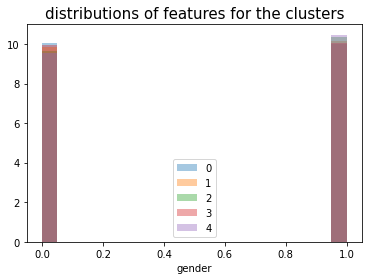

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

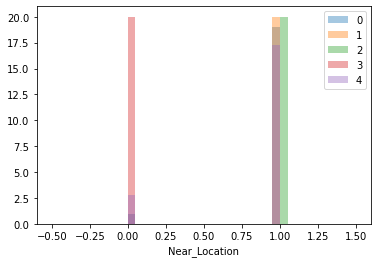

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

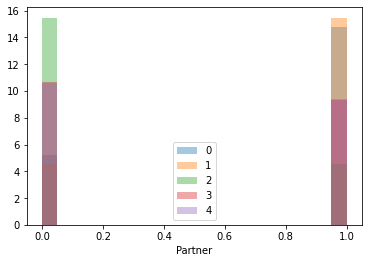

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

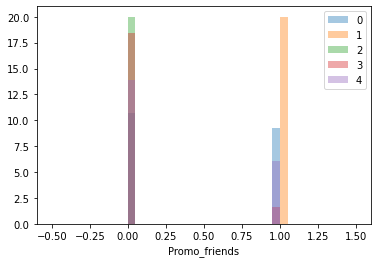

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

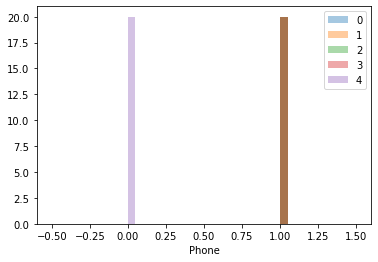

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

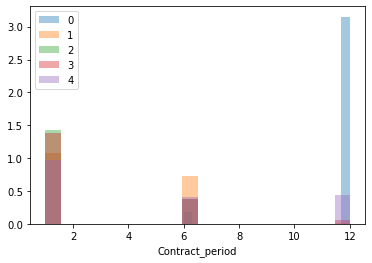

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

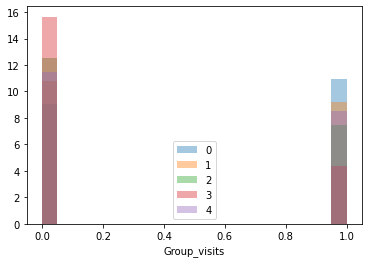

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

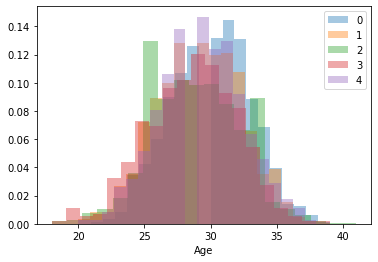

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

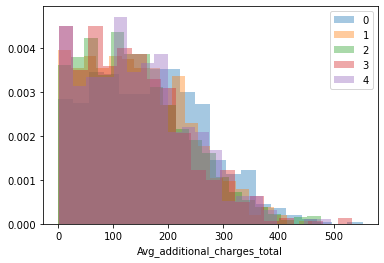

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

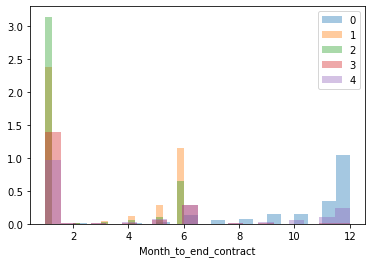

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

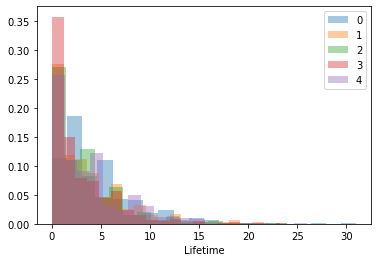

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

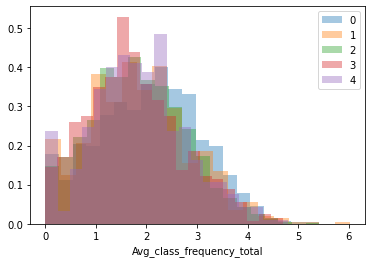

C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anait Akopyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

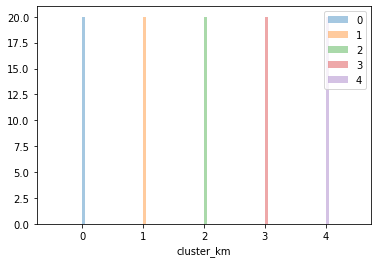

In [35]:

import seaborn as sns
data_nochurn=data.drop(columns='Churn')
plt.title('distributions of features for the clusters', fontsize=15)
plt.palette="tab10"
for name in data_nochurn.columns:
    for i in range(0,5):
        ax = sns.distplot(data_nochurn[name].loc[data_nochurn['cluster_km']==i], kde=False, norm_hist=True, bins=20, label=i)
        ax.legend()
    
    plt.show()


In [36]:
data['cluster_km'].value_counts()

2    1540
0     892
1     659
3     523
4     386
Name: cluster_km, dtype: int64

yet we can clearly see that:
 - gender doesnt affect churn
 - the largest cluster is 2 - 1540 users. But it has almost the highest churn - 36%
 - The second large cluster is 0 with 892 users and it has the lowest churn - only 2%, lets name it 'loyal cluster'
 - the cluster with the highest churn(43%) is 3, lets name the cluster 'prone to leaving'
 - the only cluster located away from the gym is 2 'prone to leaving' cluster
 - the 'loyal cluster' is twice smaller than the biggest 'prone to leaving' cluster
 - most of the users live or work near the gym
 - the 'partner companies discount' holders are almost half of all users
 - about 2/3 of all users were signed up using "bring a friend" offer
 - majority of users (apart from cluster 4) provided their phone number
 - about half of all users have 1 month membership. about 1000 out of 4000 have 1 year membership and almost all of thee users are from cluster 'loyal cluster'
 - almost 2500 users out of 4000 attend group training
 - 25-35 y o is an average user age
 - majority of users have 1 month till the end of the contract. 7 and more months till the end memberships belong to 'loyal cluster'
 - the majority - 900 users came to the gym 2 months ago

## Step 4. Overall conclusion and basic recommendations on working with customers <a class="tocSkip">


we analyze 4000 user profiles and base on that we can conclude:
- based on the cluster algorithm we got the result of 1540 out of 4000 that have 36% of 'prone to leaving'
- the loyal group is 892 users
- gender doesnt affect the churn
- all users that 'prone to leaving' live or work far away from the gym. In order to reduce the churn we can try to offer them a membership to another gym from our chain which is close to the user's location
-  users from 'prone to leaving' cluster didnt provide their phone numbers. Try to check it up and find out what was the reason. They might miss the offers and discounts from the gym and that might be a reason of leaving.
- partner company discount as well as friend's promo code can also attract users. However, its not always the crucial factor to keep being a gym user. A very big number of users has already used the offers - almost a half of them - partner company discount and 2/3 of users friend's promo code.
- another feature to reduce churn is long term membership - the 'loyal cluster' has only users with 1 year membership as soon as cluster 3 and cluster 2 - that tend to 'prone to leaving' - mainly are 1 or 2 months membership holders.
- the analysis of the time (in months) since the customer first came to the gym shows that the longer a customer is a gym user the more loyal he becomes. That means we need to really focus on the newcomers trying to attract them